<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [128]:
import pandas as pd
import psycopg2
import warnings

In [129]:
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [131]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [132]:
# текст запроса
query_3_1 = f'''select count(id) as vacancies_quantity
                from public.vacancies
            '''

In [133]:
# результат запроса
vacancies_count = pd.read_sql_query(query_3_1, connection)

vacancies_count

,vacancies_quantity
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [134]:
# текст запроса
query_3_2 = f'''select count(id) as employers_quantity
                from public.employers
            '''

In [135]:
# результат запроса
employers_count = pd.read_sql_query(query_3_2, connection)

employers_count

,employers_quantity
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [136]:
# текст запроса
query_3_3 = f'''select count(id) as areas_quantity
                from public.areas
            '''

In [137]:
# результат запроса
areas_count = pd.read_sql_query(query_3_3, connection)

areas_count

,areas_quantity
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [138]:
# текст запроса
query_3_4 = f'''select count(id) as industries_quantity
                from public.industries
            '''

In [139]:
# результат запроса
industries_count = pd.read_sql_query(query_3_4, connection)

industries_count

,industries_quantity
0,294


***

*ВЫВОДЫ:*   

*В базе данных **49197 вакансий** от **23501 работодателя**, т.е. некоторые работодатели размещают по несколько вакансий. Работодатели ищут спциалистов в **1362 регионах**. Соискатели требуются в **294 сферах деятельности.***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [140]:
# текст запроса
query_4_1 = f'''select
                    a.name as area,
                    count(v.id) as vacancies_cnt
                from public.areas a
                join public.vacancies v on a.id = v.area_id
                group by a.id
                order by count(v.id) desc
                limit 5
            '''

In [141]:
# результат запроса
regions_vacancies_df = pd.read_sql_query(query_4_1, connection)

regions_vacancies_df

,area,vacancies_cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [142]:
# текст запроса
query_4_2 = f'''select
                    count(v.id) as vacancies_cnt
                from public.vacancies v
                where v.salary_from is not null or v.salary_to is not null                          
            '''

In [143]:
# результат запроса
vacancies_with_salary = pd.read_sql_query(query_4_2, connection)

vacancies_with_salary

,vacancies_cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [144]:
# текст запроса
query_4_3 = f'''select
                    avg(v.salary_from) as avg_from,
                    avg(v.salary_to) as avg_to
                from public.vacancies v                          
            '''

In [145]:
# результат запроса
avg_salaries = (pd.read_sql_query(query_4_3, connection)).round()

avg_salaries

,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [146]:
# текст запроса
query_4_4 = f'''select
                    v.schedule,
                    v.employment,
                    count(v.id) as vacancies_qty
                from public.vacancies v
                group by 1, 2
                order by count(v.id) desc
                limit 5                           
            '''

In [147]:
# результат запроса
sch_emp_vac_qty = pd.read_sql_query(query_4_4, connection)

sch_emp_vac_qty

,schedule,employment,vacancies_qty
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [148]:
# текст запроса
query_4_5 = f'''select
                    format('Требуемый опыт работы %s', v.experience) as experience,
                    count(v.id) as vacancies_qty                   
                from public.vacancies v
                group by 1
                order by count(v.id)                        
            '''

In [149]:
# результат запроса
experience_df = pd.read_sql_query(query_4_5, connection)

experience_df

,experience,vacancies_qty
0,Требуемый опыт работы Более 6 лет,1337
1,Требуемый опыт работы Нет опыта,7197
2,Требуемый опыт работы От 3 до 6 лет,14511
3,Требуемый опыт работы От 1 года до 3 лет,26152


***

*ВЫВОДЫ:*  

*ТОП-5 регионов по количеству вакансий: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы.*   

*Более чем у половины вакансий не указана зарплата.*  
*Средняя указанная зарплатная вилка по вакансиям составляет 71 тыс. руб. - 110 тыс. руб.*  

*На большинство вакансий (35367 шт.), 70% от общего количества, требуются соискатели на полный рабочий день с полной занятостью. Еще примерно у 15% вакансий от общего количества работодатели согласны на удаленнку с полной занятостью. Полная занятость в приоритете у подавляющего большинства работодателей, разместивших вакансии.*   

*Количество вакансий для специалистов с опытом более 6 лет гораздо меньше (3% от общего количества), чем с опытом работы до 6 лет, которых большинство, особенно с опытом до 3 лет. Возможно, это объясняется тем, что работодателям требуются молодые специалисты, с возможностью дальнейшего обучения под конкретные цели. Среди более опытных специалистов вероятно меньше тякучка кадров, и они более ценятся на местах, поэтому вакансий для данной категории меньшинство.*

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [150]:
# текст запроса
query_5_1 = f'''select
                    e.name as employer,
                    count(v.id) as vacancies_cnt
                from public.employers e
                join public.vacancies v on e.id = v.employer_id
                group by e.id
                order by count(v.id) desc
                limit 5
            '''

In [151]:
# результат запроса
employers_top5 = pd.read_sql_query(query_5_1, connection)

employers_top5

,employer,vacancies_cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [152]:
# текст запроса
query_5_2 = f'''select
                    a.name as area_name,
                    count(distinct e.id) as employers_qnt,
                    count(distinct v.id) as vacancies_qnt
                from public.areas a
                left join public.vacancies v on a.id = v.area_id
                left join public.employers e on e.area = a.id
                group by a.id
                order by count(distinct v.id), count(distinct e.id) desc
            '''

In [153]:
# результат запроса
vac_emp_by_area = pd.read_sql_query(query_5_2, connection)

vac_emp_by_area


,area_name,employers_qnt,vacancies_qnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
1357,Алматы,721,1892
1358,Новосибирск,573,2006
1359,Минск,1115,2112
1360,Санкт-Петербург,2217,2851


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [154]:
# текст запроса
query_5_3 = f'''select
                    e.name as employer,
                    count(distinct v.area_id) as areas_qnt                   
                from public.employers e
                left join public.vacancies v on e.id = v.employer_id                
                group by e.id
                order by count(distinct v.area_id) desc
            '''

In [155]:
# результат запроса
reg_qnt_by_emp = pd.read_sql_query(query_5_3, connection)

reg_qnt_by_emp

,employer,areas_qnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [156]:
# текст запроса
query_5_4 = f'''select
                    count(distinct e.id) as employers_cnt                                      
                from public.employers e
                left join public.employers_industries ei on e.id = ei.employer_id
                 where ei.industry_id is null
            '''

In [157]:
# результат запроса
emp_no_industries = pd.read_sql_query(query_5_4, connection)

emp_no_industries

,employers_cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [158]:
# текст запроса
query_5_5 = f'''select
                    e.name as employer                                                         
                from public.employers e
                left join public.employers_industries ei on e.id = ei.employer_id
                group by 1
                having count(distinct ei.industry_id) = 4
                order by 1
                offset 2
                limit 1
            '''

In [159]:
# результат запроса
emp_4_industries = pd.read_sql_query(query_5_5, connection)

emp_4_industries

,employer
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [160]:
# текст запроса
query_5_6 = f'''select
                    count(distinct ei.employer_id) as employers_cnt                                                         
                from public.employers_industries ei
                join public.industries i on ei.industry_id = i.id                
                where i.name = 'Разработка программного обеспечения'               
            '''

In [161]:
# результат запроса
emp_cnt = pd.read_sql_query(query_5_6, connection)

emp_cnt

,employers_cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [162]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"

# Заголовки (чтобы Wikipedia не заблокировала запрос)
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Находим таблицу, следующую после заголовка "Список городов"
h2_tag = soup.find("h2", id="Список_городов")
table = h2_tag.find_next("table")

# Извлекаем названия городов
cities = []
for row in table.find_all("tr")[1:]:  # Пропускаем заголовок таблицы
    cells = row.find_all("td")
    if cells:
        city = cells[1].text.strip()  # Название города во втором <td>
        cities.append(city)

# Преобразуем список cities в строку, подходящую для SQL
cities_str = ", ".join([f"'{city}'" for city in cities])

print(cities_str)

'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'


In [163]:
# текст запроса
# Запрос для подсчета вакансий по регионам-миллионникам
query_areas = f'''select
                      a.name as area, 
                      count(distinct v.id) 
                  from public.vacancies v
                  left join public.areas a on a.id = v.area_id
                  left join public.employers e on e.id = v.employer_id
                  where e.name = 'Яндекс' 
                  and a.name in ({cities_str})
                  group by 1
                  order by 2
              ''' 


# Запрос для общего количества вакансий
query_total = f'''select
                      'Total' as area, 
                      count(distinct v.id) 
                  from public.vacancies v
                  left join public.areas a on a.id = v.area_id
                  left join public.employers e on e.id = v.employer_id
                  where e.name = 'Яндекс' 
                  and a.name in ({cities_str})
              '''

***

In [164]:
# результат запроса
# Выполнение запросов
areas_yandex = pd.read_sql_query(query_areas, connection)
total_vacancies = pd.read_sql_query(query_total, connection)

# Добавление строки с Total с помощью pd.concat
areas_yandex = pd.concat([areas_yandex, total_vacancies], ignore_index=True)


areas_yandex

,area,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


*ВЫВОДЫ:* 

*ТОП-5 работодателей по количеству размещенных вакансий: Яндекс, Ростелеком, Тинькофф, СБЕР и Газпром нефть.*  
*Причем количество заявок, размещенных Яндексом, почти в 5 раз больше, чем у других компаний в ТОП-5.*

*ТОП-5 регионов по количеству работодателей, разместивших вакансии: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы.*  
*Совпадает с рейтингом ТОП-5 регионов по количеству вакансий.*   
*Примечательно наличие регионов, в которых большое количество работодателей, но нет вакансий, например, Россия и Казахстан. Вероятно, это обобщающие названия, которые дублируют существующие более конкретные регионы-города, поэтому возможно их стоит исключить из выборки, как потенциальные выбросы.*  

*ТОП-3 работодателей по количеству регионов, в которых они публикуют вакансии: Яндекс (181), Ростелеком (152), Спецремонт (116).*  
*Существует ряд работодателей, у которых не указан ни один регион.*  

*У 35% работодателей не указана сфера деятельности.*  

*У 15% работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».*  

*Среди всех работодателей Яндекс является лидером по количеству размещенных вакансий и количеству регионов, в которых вакансии размещены. Вакансии компании размещены в 17 регионах-миллионниках, в общем количестве 485 вакансий. ТОП-5 регионов-миллионников, в которых Яндекс разместил вакансии: Москва, Санкт-Петербург, Екатеринбург, Нижний Новгород, Новосибирск.*


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [165]:
# текст запроса
query_6_1 = f'''select
                    count(*) vacancies_related_to_data                                                         
                from public.vacancies            
                where lower(name) like '%data%'
                    or lower(name) like '%данн%'          
            '''

In [166]:
# результат запроса
data_related_vac = pd.read_sql_query(query_6_1, connection)

data_related_vac

,vacancies_related_to_data
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [167]:
# текст запроса
query_6_2 = f'''select
                    count(*) as junior_data_scientist_vacancies                                                         
                from public.vacancies            
                where (
                    lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (lower(name) like '%ml%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%'
                )
                and (
                    lower(name) like '%junior%'
                    or lower(experience) = 'нет опыта'
                    or lower(employment) = 'стажировка'
                )
            '''        

In [168]:
# результат запроса
data_science_junior = pd.read_sql_query(query_6_2, connection)

data_science_junior

,junior_data_scientist_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [169]:
# текст запроса
query_6_3 = f'''select
                    count(*) as ds_vacancies_with_sql                                                         
                from public.vacancies
                where (
                    lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (lower(name) like '%ml%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%'
                )
                and (
                    lower(key_skills) like '%sql%'
                    or lower(key_skills) like '%postgres%'
                )
                '''

In [170]:
# результат запроса
data_science_sql = pd.read_sql_query(query_6_3, connection)

data_science_sql

,ds_vacancies_with_sql
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [171]:
# текст запроса
query_6_4 = f'''select
                    count(*) as ds_vacancies_with_python                                                         
                from public.vacancies
                where (
                    lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (lower(name) like '%ml%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%'
                )
                and lower(key_skills) like '%python%'
                '''

In [172]:
# результат запроса
data_science_python = pd.read_sql_query(query_6_4, connection)

data_science_python

,ds_vacancies_with_python
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [173]:
# текст запроса
query_6_5 = f'''select                     
                    round(
                    avg(length(key_skills) - length(replace(key_skills, chr(9), '')) + 1), 2
                ) as avg_skills_per_ds_vacancy
                from public.vacancies
                where (
                    lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (lower(name) like '%ml%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%'
                )
                and key_skills is not null                
                '''

In [174]:
# результат запроса
ds_key_skills = pd.read_sql_query(query_6_5, connection)

ds_key_skills

,avg_skills_per_ds_vacancy
0,6.55


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [175]:
# текст запроса
query_6_6 = f'''select 
                    experience,                    
                    round(avg(
                            (coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) / 2
                        ), 0) as avg_salary
                    from public.vacancies
                    where (
                        lower(name) like '%data scientist%'
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or (lower(name) like '%ml%' and lower(name) not like '%html%')
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%'
                    )
                    and (salary_from is not null or salary_to is not null)
                    group by experience
                    order by avg_salary desc             
                '''

In [176]:
# результат запроса
ds_av_salary = pd.read_sql_query(query_6_6, connection)

ds_av_salary

,experience,avg_salary
0,От 3 до 6 лет,256454.0
1,Более 6 лет,157933.0
2,От 1 года до 3 лет,144233.0
3,Нет опыта,74643.0


***

*ВЫВОДЫ:* 

*1771 вакансии имеют отношение к данным, что около 3,5% от всех вакансий. Из них 51 вакансия (3%) - для начинающего дата-сайентиста.*  

*229 вакансий для DS (13%), в которых в качестве ключевого навыка указан SQL, и 357 вакансий (20%), в которых в качестве ключевого навыка указан Python.*  

*Работодатели указывают в среднем порядка 6 ключевых навыков в вакансиях для DS.*   

*Средняя зарплата для DS варьируется от 74600 руб., для специалистов без опыта, до 256400 руб., для специалистов с опытом от 3 до 6 лет.*  

*Примечательно, что средняя зарплата для специалистов с опытом от 3 до 6 лет (256400 руб.) значительно выше, чем средняя зарплата для специалистов с опытом более 6 лет (158000 руб.). Это может быть связано со смещением по выборке: в базе данных немного вакансий для специалистов с опытом более 6 лет (3% от общего количества) — а те, что есть, возможно, в компаниях с более скромными бюджетами (например, госструктуры или небольшие IT-компании). Для категории "от 3 до 6 лет" наоборот — часто охотятся за middle/senior-специалистами с хорошей технической базой, и их активно переманивают, предлагая высокие зарплаты.*


# Юнит 7.  Дополнительные исследования по проекту

1. Сравнение регионов по уровню зарплат для DS-специалистов.

Задача: посчитать среднюю зарплату по каждому региону только для DS-вакансий.

*Этот запрос показывает, в каких регионах работодатели предлагают самые высокие зарплаты для дата-сайентистов, с учетом количества вакансий, участвующих в расчетах.* 

In [177]:
# текст запроса
query_7_1 = f'''select 
                    a.name as region,
                        count(*) as vacancy_count,
                        round(avg((coalesce(v.salary_from, v.salary_to) + coalesce(v.salary_to, v.salary_from)) / 2.0), 0) as avg_ds_salary
                    from public.vacancies v
                    join public.areas a on v.area_id = a.id
                    where (
                        lower(v.name) like '%data scientist%'
                        or lower(v.name) like '%data science%'
                        or lower(v.name) like '%исследователь данных%'
                        or (lower(v.name) like '%ml%' and lower(v.name) not like '%html%')
                        or lower(v.name) like '%machine learning%'
                        or lower(v.name) like '%машинн%обучен%'
                    )
                    and (v.salary_from is not null or v.salary_to is not null)
                    group by a.name
                    order by vacancy_count desc, avg_ds_salary desc 
                    limit 13   
                '''

In [178]:
# результат запроса
ds_salary_by_area = pd.read_sql_query(query_7_1, connection)

ds_salary_by_area

,region,vacancy_count,avg_ds_salary
0,Москва,29,214000.0
1,Санкт-Петербург,9,183150.0
2,Рязань,4,127500.0
3,Армения,3,268863.0
4,Ростов-на-Дону,3,241667.0
5,Новосибирск,3,166333.0
6,Казань,3,161833.0
7,Екатеринбург,3,124000.0
8,Алматы,3,120013.0
9,Пермь,3,116667.0


2. ТОП-10 наиболее часто встречающихся навыков в DS-вакансиях.

Задача: определить популярные ключевые навыки по вакансиям, относящимся к Data Science.

In [179]:
# текст запроса
# Переводим каждую строку из key_skills в набор отдельных навыков, один навык — одна строка,
# и подсчитываем насколько часто каждый навык встречается.
query_7_2 = f'''select 
                    unnest(string_to_array(lower(key_skills), chr(9))) as skill,
                    count(*) as frequency
                from public.vacancies
                where (
                    lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (lower(name) like '%ml%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%'
                )
                and key_skills is not null               
                group by skill
                order by frequency desc
                limit 10
                '''

In [180]:
# результат запроса
key_skills_top_10 = pd.read_sql_query(query_7_2, connection)

key_skills_top_10

,skill,frequency
0,python,354
1,sql,208
2,machine learning,140
3,git,81
4,data science,64
5,математическая статистика,62
6,pytorch,61
7,data analysis,55
8,pandas,55
9,linux,53


3. ТОП-10 самых популярных вакансий.

Задача: определить наиболее распространённые вакансии в базе данных.

In [181]:
# текст запроса 
# Считаем сколько раз каждая вакансия встречается в базе и выводим первых 10.
query_7_3 = f'''select 
                    lower(name) as vacancy_name,
                    count(*) as vacancy_count
                from public.vacancies
                group by lower(name)
                order by vacancy_count desc
                limit 10
                '''

In [182]:
# результат запроса
top_vacancies = pd.read_sql_query(query_7_3, connection)

top_vacancies


,vacancy_name,vacancy_count
0,системный администратор,1762
1,программист 1с,1168
2,бизнес-аналитик,492
3,специалист технической поддержки,457
4,системный аналитик,434
5,аналитик,404
6,инженер-программист,389
7,программист 1c,360
8,frontend-разработчик,242
9,инженер технической поддержки,230


# Общий вывод по проекту

Анализ базы данных с вакансиями на платформе HeadHunter выявил ключевые особенности российского IT-рынка труда на момент исследования. Наиболее распространённые вакансии в базе — это **системный администратор**, **программист 1С**, **бизнес-аналитик** и **специалист технической поддержки**, что отражает высокий спрос на специалистов в области поддержки, администрирования и внутренней автоматизации. Вакансии, связанные с анализом данных, встречаются заметно реже.  

Из почти **50 тыс. вакансий**, только **3,5% связаны с анализом данных**, что подчеркивает узкую нишевость сферы **Data Science**. Среди них доля вакансий для начинающих специалистов — всего **3%**, что указывает на высокую планку входа и предпочтение работодателей к более опытным кандидатам.

Рынок Data Science ориентирован преимущественно на специалистов **с опытом 3–6 лет**, которым предлагаются самые высокие зарплаты (**в среднем 256 400 руб.**). При этом средняя зарплата для специалистов **с опытом более 6 лет** ниже (**158 000 руб.**), что может быть связано с ограниченным числом таких вакансий и потенциальным смещением данных (например, вакансии от госкомпаний или небольших организаций с ограниченным бюджетом).

Для сравнения: **средняя указанная зарплатная вилка по всем вакансиям** в базе составляет **71 000 – 110 000 руб.**, что существенно ниже, чем по DS-вакансиям. Это подтверждает, что профессия **Data Scientist** остаётся одной из наиболее высокооплачиваемых на рынке.

Анализ региональной дифференциации зарплат **Data Scientist** показал, что лидером по количеству вакансий с указанной зарплатой остаётся **Москва** (**29 вакансий**, средняя зарплата — **214 000 руб.**), за ней следуют **Санкт-Петербург** (**183 150 руб.**) и **Новосибирск** (**166 333 руб.**).

В некоторых регионах — например, **Минск** (2 вакансии) и **Армения** (3 вакансии) — предлагаются наивысшие зарплаты (до **314 785 руб.**), однако **малый объём выборки требует осторожного интерпретирования** таких данных. Это подчёркивает важность учёта **количества вакансий** при анализе и сравнении зарплат по регионам.

Наиболее востребованные навыки — **Python** и **SQL**, встречающиеся в **20%** и **13%** вакансий соответственно. В среднем работодатели указывают около **6 ключевых навыков** в описании вакансии, что подтверждает тенденцию к поиску **универсальных специалистов**.

Анализ ключевых навыков показал, что в топ-6 наиболее часто упоминаемых входят **Python**, **SQL**, **Machine Learning**, **Git**, **Data Science** и **математическая статистика**. Это подтверждает, что работодатели ожидают от кандидатов владения как практическими инструментами, так и базовыми знаниями в области анализа и статистики.

Вакансии и работодатели географически сконцентрированы в крупных городах: **Москва**, **Санкт-Петербург**, **Минск**, **Новосибирск** и **Алматы**. Крупнейший работодатель — **Яндекс**, который значительно опережает другие компании как по количеству вакансий, так и по географии их размещения.

Также выявлены потенциальные **аномалии в данных**: наличие обобщённых регионов (например, «Россия», «Казахстан») без конкретных вакансий, а также большое количество работодателей, не указавших сферу деятельности (**35%**). Это даёт основания для **очистки и корректировки данных** перед построением рекомендательных систем.

# Визуализация некоторых данных по проекту

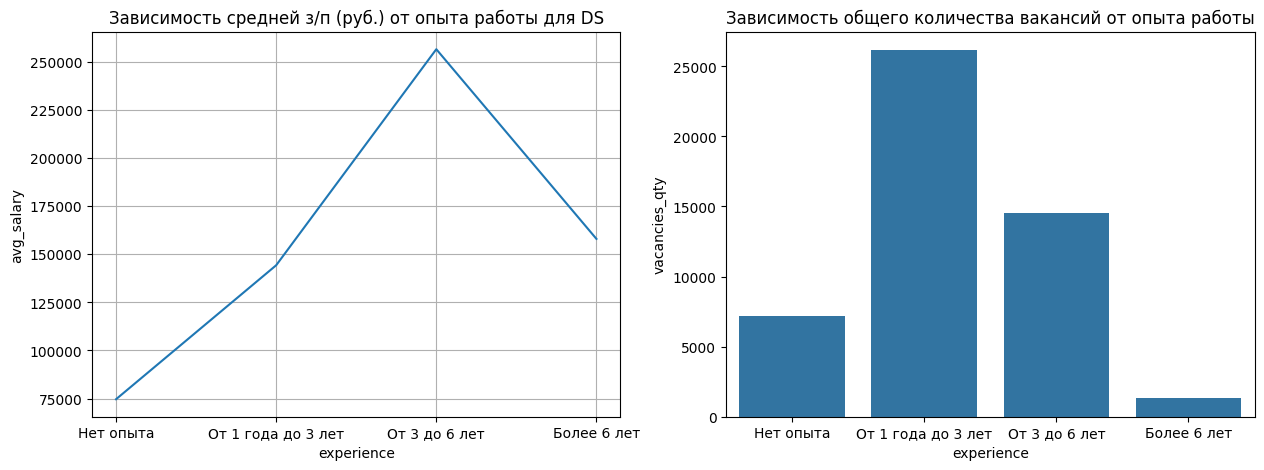

In [191]:
# Строим графики зависимости з/п для DS и количества вакансий в базе от опыта работы
import matplotlib.pyplot as plt
import seaborn as sns

# Задание порядка категорий
order = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']

# Чистим столбец с опытом во втором датафрейме (опыт работы/количество вакансий)
experience_df['experience'] = experience_df['experience'].str.replace('Требуемый опыт работы ', '')

# Приводим столбец 'experience' в первом датафрейме (з/п для DS/опыт работы)
# к категориальному типу с заданным порядком
ds_av_salary['experience'] = pd.Categorical(ds_av_salary['experience'], categories=order, ordered=True)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Линейный график: средняя зарплата для DS по опыту работы
sns.lineplot(
    data=ds_av_salary,
    x='experience', 
    y='avg_salary',  
    ax=axes[0]  
)

# Столбчатая диаграмма: количество вакансий по опыту работы
sns.barplot(
    x='experience', 
    y='vacancies_qty', 
    data=experience_df, 
    ax=axes[1],
    order=order    
)

axes[0].set_title('Зависимость средней з/п (руб.) от опыта работы для DS')
axes[1].set_title('Зависимость общего количества вакансий от опыта работы')
axes[0].grid(True)

*Визуализация показательно иллюстрирует вышеприведенные выводы.*

In [ ]:
# не забываем закрыть соединение после окончания работы
connection.close()